SGD
===

**Autor:** Mateus de Jesus Mendes

# Introdução

Este *Jupyter Notebook* tem por objetivo implementar o algoritmo *Stochastic Gradient Descent* (SGD) para induzir um modelo a partir dos elementos do *dataset* `xtb_dataset.csv`.

## Fundamentação Teórica

O `SGDRegressor` é um estimador de regressão linear pertencente à família dos métodos de otimização iterativa por gradiente, amplamente empregado em problemas de aprendizado supervisionado com grande volume de dados ou alta dimensionalidade **\[[1, 2]()\]**. Diferentemente de métodos analíticos clássicos — como a regressão linear por mínimos quadrados ordinários — o `SGDRegressor` não resolve o problema de forma fechada. Em vez disso, ele constrói a solução de maneira incremental, ajustando os parâmetros do modelo a partir de atualizações sucessivas baseadas em amostras individuais ou pequenos subconjuntos dos dados **\[[3]()\]**.

Esse paradigma confere ao `SGDRegressor` elevada escalabilidade, eficiência computacional e flexibilidade, tornando-o particularmente adequado para cenários em que se deseja combinar linearidade estrutural, regularização explícita e controle preciso da generalização **\[[2, 4]()\]**.

### Formulação do Modelo Linear

O SGDRegressor assume um modelo linear da forma

$$\hat{y} = f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b$$

em que:

* $\mathbf{x} \in \mathbb{R}^d$ representa o vetor de *features*,
* $\mathbf{w} \in \mathbb{R}^d$ é o vetor de pesos do modelo,
* $b \in \mathbb{R}$ é o termo de intercepto,
* $\hat{y}$ é a predição associada à entrada $\mathbf{x}$.

O objetivo do algoritmo é estimar $\mathbf{w}$ e $b$ de modo a minimizar uma função de perda que quantifica o erro entre as predições do modelo e os valores reais observados **\[[1, 5]()\]**.


### *Loss Function* e Risco Empírico

No caso mais comum — e adotado neste trabalho — o SGDRegressor utiliza a perda quadrática (*squared error loss*), definida como:
$$
\mathcal{L}(y, \hat{y}) = (y - \hat{y})^2.
$$

A função objetivo global corresponde ao risco empírico regularizado, dado por:
$$
\mathcal{J}(\mathbf{w}, b) =
\frac{1}{N} \sum_{i=1}^{N} (y_i - \mathbf{w}^\top \mathbf{x}_i - b)^2 + \lambda , \Omega(\mathbf{w})
$$

Em que:
- $N$ é o número de amostras,
- $\lambda > 0$ é o coeficiente de regularização,
- $\Omega(\mathbf{w})$ é o termo de penalização aplicado aos pesos [3, 6].

No caso da regularização $\ell_2$ (*Ridge*), utilizada neste modelo, tem-se
$$
\Omega(\mathbf{w}) = |\mathbf{w}|_2^2.
$$

Esse termo impõe uma penalização quadrática sobre a magnitude dos coeficientes, reduzindo variância, prevenindo *overfitting* e favorecendo soluções estáveis e bem condicionadas **\[[1, 4]()\]**.

### *Stochastic Gradient Descent*

<figure style="text-align: center">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*vchQOUUW_RPVjkb4pQF-1A.gif"
         alt="SGD"
         width="500"
         height="300">
    <figcaption>Ilustração esquemática do funcionamento da <em>Descida do Gradiente Estocástica (SGD).</em> Fonte: <b>[9]</b></figcaption>
</figure>

Ao contrário da descida do gradiente clássica (*batch gradient descent*), que calcula o gradiente da função objetivo usando todo o conjunto de dados, a descida do gradiente estocástica aproxima esse gradiente utilizando uma única amostra (ou um pequeno *mini-batch*) por iteração **\[[2, 7]()\]**.

Para uma observação $(\mathbf{x}_i, y_i)$, os gradientes da função de perda regularizada são:

$$
\nabla_{\mathbf{w}} =
-2 (y_i - \hat{y}_i)\mathbf{x}_i + 2\lambda \mathbf{w},
$$

$$
\nabla_b =
-2 (y_i - \hat{y}_i).
$$

A atualização dos parâmetros ocorre segundo:

$$
\mathbf{w}_{t+1} = \mathbf{w}*t - \eta_t \nabla*{\mathbf{w}},
$$

$$
b_{t+1} = b_t - \eta_t \nabla_b,
$$

em que $\eta_t$ é a taxa de aprendizado na iteração $t$ **\[[2, 3]()\]**.

Essa abordagem introduz ruído estocástico nas atualizações, o que pode favorecer a convergência para mínimos mais robustos e melhorar a capacidade de generalização do modelo **\[[7]()\]**.

### Taxa de Aprendizado Adaptativa

O desempenho do SGD é altamente sensível à escolha da taxa de aprendizado. Para mitigar essa dependência, o SGDRegressor pode empregar esquemas de taxa de aprendizado adaptativa, nos quais $\eta_t$ é ajustada dinamicamente ao longo do treinamento **\[[5]()\]**.

Nesse regime, a taxa inicial $\eta_0$ é reduzida automaticamente quando o erro deixa de diminuir de forma consistente, permitindo:

- exploração eficiente do espaço de parâmetros no início,
- refinamento progressivo da solução,
- maior estabilidade numérica nas etapas finais da otimização **\[[2]()\]**.

### Pré-processamento e Condicionamento do Problema


Como o SGDRegressor opera diretamente sobre gradientes, ele é particularmente sensível à escala das *features*. Assim, o uso de normalização ou padronização é essencial para garantir convergência eficiente e estável **\[[1, 4]()\]**.

Adicionalmente, técnicas de seleção de variáveis — como *Variance Threshold* — contribuem para reduzir redundâncias, eliminar ruído e melhorar o condicionamento do problema antes da etapa de otimização **\[[5]()\]**.

### Interpretação do modelo e Transparência

Por se tratar de um modelo linear, o SGDRegressor oferece elevada interpretabilidade, uma vez que cada coeficiente $w_j$ representa diretamente a contribuição da *feature* correspondente para a predição **\[[1]()\]**.

Quando combinado com métodos modernos de interpretação baseados em SHAP, o modelo permite análises globais e locais consistentes, conectando a formulação matemática aos mecanismos empíricos observados nos dados **\[[8]()\]**.

### Considerações finais

O SGDRegressor representa uma síntese eficiente entre simplicidade estrutural, escalabilidade computacional e controle estatístico rigoroso. Ao empregar uma formulação linear regularizada e uma estratégia de otimização estocástica, o algoritmo é capaz de extrair relações dominantes em espaços de alta dimensionalidade mantendo estabilidade, generalização e interpretabilidade **\[[2, 4]()\]**.

No contexto deste trabalho, o uso do SGDRegressor mostrou-se particularmente adequado para capturar relações energéticas globais de forma precisa, parcimoniosa e fisicamente coerente, evidenciando que modelos lineares bem regularizados podem atingir desempenho elevado quando alinhados à estrutura intrínseca dos dados.

# Metodologia

### Importações

In [219]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import root_mean_squared_error
from sklearn.exceptions import ConvergenceWarning

from optuna import create_study
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
from optuna.exceptions import TrialPruned
from optuna import load_study
from optuna.trial import FixedTrial

import warnings

import os

import shap

### Definições Globais

Definições de parâmetros globais usados ao longo desse *Jupyter Notebook*, a fim de assegurar clareza metodológica e reprodutibilidade:

In [ ]:
RANDOM_SEED = 88
PATH = '../dataset_processing/xtb_dataset.csv'
TRAIN_SIZE = 0.8
STUDY_NAME = 'sgd'

### Leitura dos Dados

Leitura do *dataset*:

In [221]:
df = pd.read_csv(PATH)

X = df.drop(columns=['Delta'])
y = df['Delta']

### Pré-processamento dos Dados

Divisão do *dataset* em subconjuntos de dados de treino e teste, considerando as *features* e o *target*:

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_SEED)

### Treino & Otimização de Hiperparâmetros

Função para instanciar o modelo com todos os hiperparâmetros e tratamentos a serem usados pelo `optuna`:

In [223]:
def inst_sgd(trial, n_features):
    # Pré-processamento
    pre_processing = trial.suggest_categorical(
        "pre_processing", [None, "VT"]
    )

    steps = []


    # Normalização
    steps.append(("scale", StandardScaler()))


    # Variance Threshold
    if pre_processing == "VT":
        threshold = trial.suggest_float(
            "variance_threshold", 0.0, 1e-3
        )
        steps.append((
            "vt", VarianceThreshold(threshold=threshold)
        ))


    # Hiperparâmetros do SGD
    loss = trial.suggest_categorical(
        "loss", ["squared_error", "huber", "epsilon_insensitive"]
    )

    penalty = trial.suggest_categorical(
        "penalty", ["l2", "l1", "elasticnet"]
    )

    alpha = trial.suggest_float(
        "alpha", 1e-6, 1e-2, log=True
    )

    l1_ratio = None
    if penalty == "elasticnet":
        l1_ratio = trial.suggest_float(
            "l1_ratio", 0.1, 0.9
        )

    learning_rate = trial.suggest_categorical(
        "learning_rate", ["invscaling", "adaptive"]
    )

    eta0 = trial.suggest_float(
        "eta0", 1e-3, 1e-1, log=True
    )


    # Modelo SGD
    steps.append((
        "sgd", SGDRegressor(
            loss=loss,
            penalty=penalty,
            alpha=alpha,
            l1_ratio=l1_ratio,
            learning_rate=learning_rate,
            eta0=eta0,
            max_iter=5_000,
            tol=1e-3,
            random_state=RANDOM_SEED
        )
    ))

    model = make_pipeline(*[s[1] for s in steps])

    return model

Função objetivo para validação cruzada:

In [224]:
def objective_function(trial, X, y, NUM_FOLDS=5):
    n_features = X.shape[1]
    cv = KFold(
        n_splits=NUM_FOLDS,
        shuffle=True,
        random_state=RANDOM_SEED
    )

    rmse_folds = []

    for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        model = inst_sgd(trial, n_features=n_features)

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse = root_mean_squared_error(y_test, y_pred)

        rmse_folds.append(rmse)

        trial.report(np.mean(rmse_folds), step=i + 1)
        if trial.should_prune():
            raise TrialPruned()

    return float(np.mean(rmse_folds))

Funções para validação cruzada aninhada:

In [225]:
def nested_cv_fold(fold_idx, X, y, outer_splits, inner_splits, n_trials, studies_folder):
    outer_cv = KFold(n_splits=outer_splits, shuffle=True, random_state=RANDOM_SEED)

    for fold, (idx_train, idx_test) in enumerate(outer_cv.split(X, y)):
        if fold != fold_idx:
            continue

        print(f"\nFold externo {fold + 1}/{outer_splits}")

        X_train, X_test = X.iloc[idx_train], X.iloc[idx_test]
        y_train, y_test = y.iloc[idx_train], y.iloc[idx_test]

        db_path = os.path.join(
            studies_folder,
            f"{STUDY_NAME}_fold_{fold + 1}.db"
        )

        def inner_objective(trial):
            return objective_function(
                trial,
                X_train,
                y_train,
                NUM_FOLDS=inner_splits
            )

        study = create_study(
            study_name=f"{STUDY_NAME}_fold_{fold + 1}",
            direction="minimize",
            sampler=TPESampler(seed=RANDOM_SEED),
            pruner=HyperbandPruner(
                min_resource=1,
                max_resource=inner_splits,
                reduction_factor=2
            ),
            storage=f"sqlite:///{db_path}",
            load_if_exists=True
        )

        study.optimize(
            inner_objective,
            n_trials=n_trials,
            n_jobs=1,
            show_progress_bar=False
        )

        print("Melhores hiperparâmetros encontrados:")
        print(study.best_params)

        best_model = inst_sgd(
            FixedTrial(study.best_params),
            n_features=X_train.shape[1]
        )

        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            rmse_test = root_mean_squared_error(y_test, y_pred)

        print(f"RMSE de teste externo (fold {fold + 1}): {rmse_test:.4f}")
        return rmse_test

In [226]:
def nested_cv(X, y, outer_splits=5, inner_splits=3, n_trials=200, studies_folder=f"optuna_{STUDY_NAME}_studies"):
    os.makedirs(studies_folder, exist_ok=True)
    outer_scores = []

    for fold in range(outer_splits):
        rmse_fold = nested_cv_fold(
            fold_idx=fold,
            X=X,
            y=y,
            outer_splits=outer_splits,
            inner_splits=inner_splits,
            n_trials=n_trials,
            studies_folder=studies_folder
        )
        outer_scores.append(rmse_fold)

    outer_scores = np.array(outer_scores)

    print("\n========================")
    print("Resultados do Nested CV:")
    print(f"RMSE médio: {outer_scores.mean():.4f}")
    print(f"Desvio padrão: {outer_scores.std():.4f}")
    print("========================")

    return outer_scores

Execução dos estudos de otimização de hiperparâmetros do `optuna`:

> **📌 Observação:** O seguinte código está comentado como célula Markdown por apresentar elevado custo computacional. Desse modo, é recomendada execução do *script* `SGD.py` utilizando computação de alto desempenho (HPC) a fim de garantir eficiência e estabilidade computacional na execução dos estudos de otimização. Após isso, basta o diretório `SGD_optuna_studies` para o mesmo diretório desse *Jupyter Notebook* e executar as células seguintes.

---
```python
results = nested_cv(X_train, y_train, outer_splits=5, inner_splits=3, n_trials=40)
```
---

Acesso aos estudos de otimização, para extração dos melhores valores dos hiperparâmetros e o desempenho obtido:

In [227]:
studies_folder = f'optuna_{STUDY_NAME}_studies'
db_files = [f for f in os.listdir(studies_folder) if f.endswith('.db')]

print('Arquivos .db encontrados:')
for f in db_files:
    print("-", f)

Arquivos .db encontrados:
- sgd_fold_1.db
- sgd_fold_2.db
- sgd_fold_3.db
- sgd_fold_4.db
- sgd_fold_5.db


Melhores hiperparâmetros obtidos durante a otimização:

In [228]:
results = []

for file in db_files:
    path = os.path.join(studies_folder, file)
    study_name = file.replace('.db', '')
    
    try:
        study = load_study(study_name=study_name, storage=f"sqlite:///{path}")
        best_trial = study.best_trial
        
        print(f"##### {study_name} #####")
        print(f"  Melhor valor: {best_trial.value:.7f}")
        print(f"  Parâmetros: {best_trial.params}\n")

        results.append({
            "fold": study_name,
            "best_value": best_trial.value,
            "params": best_trial.params
        })
    except Exception as e:
        print(f"Não foi possível carregar {study_name}: {e}")

# Exibe melhores resultados
if results:
    df_results = pd.DataFrame(results)
    #display(df_results)
    print(f"RMSE médio: {np.mean(df_results['best_value'])}")
    print(f"Desvio padrão: {np.std(df_results['best_value'])}")
else:
    print("Nenhum estudo pôde ser carregado.")

##### sgd_fold_1 #####
  Melhor valor: 0.0001741
  Parâmetros: {'pre_processing': 'VT', 'variance_threshold': 0.0007964646639600058, 'loss': 'squared_error', 'penalty': 'l2', 'alpha': 4.596373920761011e-06, 'learning_rate': 'adaptive', 'eta0': 0.01705243803453705}

##### sgd_fold_2 #####
  Melhor valor: 0.0001743
  Parâmetros: {'pre_processing': 'VT', 'variance_threshold': 0.0006833989853847422, 'loss': 'huber', 'penalty': 'l1', 'alpha': 1.9333276779801083e-06, 'learning_rate': 'adaptive', 'eta0': 0.024781194035310112}

##### sgd_fold_3 #####
  Melhor valor: 0.0001729
  Parâmetros: {'pre_processing': 'VT', 'variance_threshold': 0.0003095313058332159, 'loss': 'squared_error', 'penalty': 'l2', 'alpha': 6.2269177801281935e-06, 'learning_rate': 'adaptive', 'eta0': 0.0644834328258094}

##### sgd_fold_4 #####
  Melhor valor: 0.0001735
  Parâmetros: {'pre_processing': 'VT', 'variance_threshold': 0.0007187132974887341, 'loss': 'huber', 'penalty': 'elasticnet', 'alpha': 6.747377491869794e-06, '

Desempenho do melhor modelo obtido:

In [229]:
best_fold = df_results.loc[df_results['best_value'].idxmin()]  # menor RMSE
print("Melhor fold:", best_fold['fold'])
print("Melhor desempenho (RMSE):", best_fold['best_value'])
print("Melhores parâmetros:", best_fold['params'])

Melhor fold: sgd_fold_3
Melhor desempenho (RMSE): 0.00017293524962767287
Melhores parâmetros: {'pre_processing': 'VT', 'variance_threshold': 0.0003095313058332159, 'loss': 'squared_error', 'penalty': 'l2', 'alpha': 6.2269177801281935e-06, 'learning_rate': 'adaptive', 'eta0': 0.0644834328258094}


### Teste

Treino e teste finais para avaliação do melhor modelo obtido:

In [230]:
sgd_model = SGDRegressor(loss='squared_error',
                          penalty='l2',
                          alpha=6.2269177801281935e-06,
                          learning_rate='adaptive',
                          eta0=0.0644834328258094)

best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('pre_processing', VarianceThreshold(0.0003095313058332159)),
    ('estimator', sgd_model)
])

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_pred)

print("RMSE do melhor modelo:", rmse_test)

RMSE do melhor modelo: 0.0001721341036588281


# Resultados

O melhor modelo induzido a partir do algoritmo SGD durante a otimização de hiperparâmetros do `optuna` obteve $\mathrm{RMSE}$ de $\approx 1.73 \times 10^{-4}$, dotado dos seguintes hiperparâmetros tabulados e com o conjunto de dados submetido a uma etapa explícita de pré-processamento baseada em *Variance Threshold* $(\approx 3,09 \times 10^{-4})$.

| Hiperparâmetros      | Valor                   |
| -------------------- | ----------------------- |
| `loss`               | `squared_error`         |
| `penalty`            | `l2`                    |
| `alpha`              | $6.2269 \times 10^{-6}$ |
| `learning_rate`      | `adaptive`              |
| `eta0`               | $0.06448$               |

Por fim, ao desenvolver o teste final, o modelo induzido com os hiperparâmetros supracitados obteve $\mathrm{RMSE}$ de $\approx 1.74 \times 10^{-4}$, objetivamente maior, mas com mesma ordem de grandeza.

# SHAP

Para analisar a interpretabilidade do modelo vencedor encontrado pelo *Optuna*, é necessário carregá-lo a partir do arquivo de estudo utilizando a função `load_study()`.

> **📌 Observação importante:** O *SHAP* não aceita um *pipeline* completo como entrada, ele requer um modelo final ou uma função de predição. Por isso, cria-se um *trial* “falso” (`FixedTrial`) com os melhores hiperparâmetros para instanciar o pipeline vencedor.

Além disso, o modelo não é definido apenas pelos hiperparâmetros do algoritmo (`SGD`), mas também inclui todas as etapas de pré-processamento do pipeline, como normalização, redução de dimensionalidade ou seleção de *features*. Essas transformações devem ser aplicadas corretamente antes de calcular os valores de SHAP, garantindo que a explicação reflita exatamente como o modelo processa os dados.

In [231]:
scaler = best_model.named_steps['scaler']
sgd_model = best_model.named_steps['estimator']

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_train)

explainer = shap.LinearExplainer(sgd_model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)
shap_values_exp = shap.Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=X_test,
    feature_names=X_test.columns
)

#### *Summary Plot*

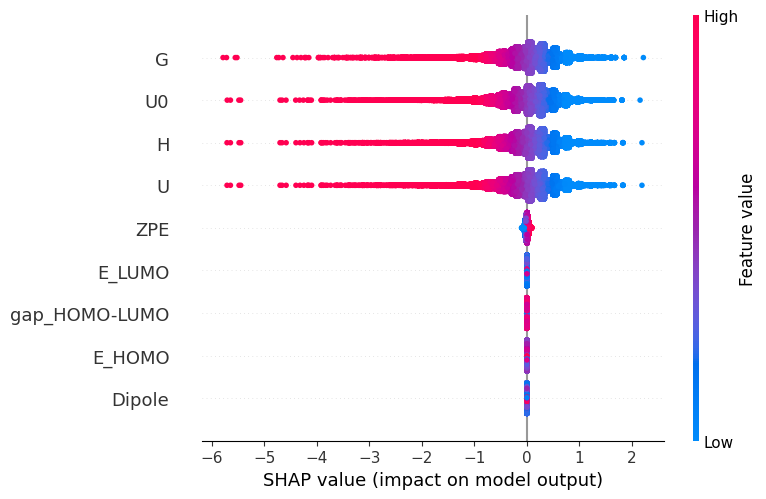

In [232]:
shap.summary_plot(shap_values_exp, features=X_test_scaled)

O gráfico acima é um SHAP *summary plot*, uma forma de visualizar a importância e o efeito das variáveis em um modelo preditivo.  

Cada ponto representa uma observação (amostra do conjunto de dados), e sua posição no eixo horizontal indica o impacto da *feature* no *output* do modelo — isto é, o quanto aquela variável contribuiu para aumentar ou diminuir a predição.

Cada ponto representa uma amostra, com a cor indicando o valor da *feature* (rosa = alto, azul = baixo).

**Análise geral**

- **Eixo X (SHAP *value*)**: mostra o quanto cada *feature* contribui para aumentar (valores positivos) ou diminuir (valores negativos) a predição do modelo.
- **Eixo Y (*features*)**: ordena as variáveis por importância média (impacto absoluto dos valores SHAP).
- **Cores**: representam o valor real da *feature* — tons quentes (rosa/vermelho) indicam valores altos, e tons frios (azul) indicam valores baixos.

**Interpretação Detalhada**

1. `G`, `U0`, `H` e `U`

- Essas quatro variáveis concentram praticamente toda a capacidade explicativa do modelo, destacando-se de forma inequívoca em relação às demais *features*.
- Observa-se uma dispersão ampla e sistemática dos valores SHAP, com predominância de contribuições negativas associadas a valores altos das variáveis (tons rosados) e contribuições positivas associadas a valores baixos (tons azulados).
- Esse comportamento indica uma relação inversa robusta e aproximadamente linear: aumentos em energia de Gibbs, energia interna de referência, entalpia ou energia interna tendem a reduzir a predição do modelo, enquanto valores menores dessas grandezas elevam a resposta prevista.
- A estrutura praticamente simétrica e contínua da dispersão ao longo do eixo SHAP reflete a natureza do SGD com perda quadrática e penalização L2, sugerindo que o modelo capturou gradientes lineares dominantes, sem evidência de efeitos não lineares residuais relevantes.

2. `ZPE`

- A variável de energia do ponto zero apresenta impacto extremamente reduzido, com valores SHAP fortemente concentrados em torno de zero.
- Não se observa padrão direcional consistente, indicando que variações nessa *feature* não alteram significativamente a saída do modelo.
- Isso sugere que, no contexto do espaço amostral analisado, a ZPE não adiciona informação preditiva independente relevante além daquela já contida nas grandezas termodinâmicas globais.

3. `E_LUMO`, `gap_HOMO–LUMO`, `E_HOMO` e `Dipole`

- Essas propriedades eletrônicas exibem impacto marginal, com dispersão mínima ao longo do eixo SHAP e ausência de qualquer tendência direcional clara.
- Mesmo para valores extremos dessas variáveis, a contribuição para a predição permanece praticamente nula.
- Esse comportamento é consistente com um modelo linear fortemente regularizado, no qual *features* pouco informativas são efetivamente suprimidas, reforçando sua irrelevância estrutural para a tarefa de regressão considerada.

O modelo SGD fundamenta suas previsões quase exclusivamente em variáveis termodinâmicas globais (`G`, `U0`, `H`, `U`), enquanto propriedades eletrônicas finas — como energias orbitais, *gap* HOMO–LUMO e momento dipolar — exercem papel residual. A interpretação SHAP revela uma dependência essencialmente linear, coerente com a arquitetura do modelo e com o regime de regularização adotado.

***Insight* científico**

A dominância absoluta das grandezas energéticas globais indica que o modelo SGD internalizou uma lei energética macroscópica dominante, possivelmente associada à estabilidade termodinâmica ou ao balanço energético do sistema. A irrelevância das variáveis eletrônicas sugere que, no domínio de dados analisado, esses efeitos são de ordem secundária ou já se encontram implicitamente codificados nas grandezas termodinâmicas. Tal resultado reforça não apenas a coerência física do modelo, mas também sua interpretabilidade causal, evidenciando que a predição está ancorada em princípios energéticos fundamentais, e não em correlações espúrias de alta dimensionalidade.


As indicações apresentadas pelo SHAP podem ser confirmadas por meio de uma nova previsão, mas somente com as *features* que o SHAP apresenta como as mais relevantes.

In [235]:
best_model.fit(X_train[['G', 'U0', 'H', 'U']], y_train)

y_pred = best_model.predict(X_test[['G', 'U0', 'H', 'U']])

rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE do melhor modelo: {rmse}')

RMSE do melhor modelo: 0.0008982641417752719


### *Bar Plot*

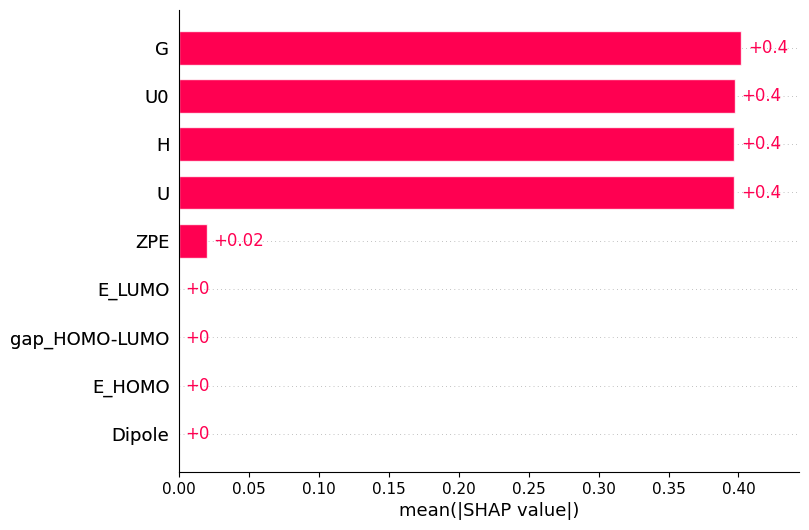

In [233]:
shap.plots.bar(shap_values_exp)

O gráfico acima mostra a importância média das variáveis no modelo, calculada pela média dos valores absolutos de SHAP (`mean(|SHAP value|)`).  
Ele representa, em termos quantitativos, o quanto cada *feature* contribui em média para as variações das previsões.

`Estrutura do gráfico`
- **Eixo X:** magnitude média dos valores SHAP — quanto maior, maior o impacto da *feature* no resultado.  
- **Eixo Y:** lista das *features* avaliadas.  
- **Cor e anotação à direita:** indicam o valor numérico do impacto médio.

**Interpretação Detalhada**

1. `G`, `U0`, `H` e `U`
- Essas quatro variáveis dominam de forma absoluta a importância média do modelo, cada uma apresentando valores de $\mathrm{mean}(|\mathrm{SHAP}|) \approx 0.4$.
- A virtual equivalência entre suas magnitudes indica que o modelo distribui o peso preditivo de maneira quase simétrica entre as principais grandezas termodinâmicas globais.
- Esse resultado sugere que nenhuma dessas variáveis atua como fator isolado dominante; ao contrário, o modelo aprende uma combinação linear balanceada dessas energias, coerente com a formulação física do problema.
- A expressiva separação entre esse grupo e todas as demais *features* evidencia que o SGD se ancora quase exclusivamente nesse subespaço energético de baixa dimensionalidade.

2. `ZPE`
- A energia do ponto zero apresenta importância média significativamente menor, com $\mathrm{mean}(|\mathrm{SHAP}|) \approx 0.02$.
- Embora não seja estritamente nula, sua contribuição é quase uma ordem de grandeza inferior às variáveis dominantes.
- Esse comportamento indica que a ZPE atua, no máximo, como um termo corretivo fraco, sem papel estrutural na determinação da predição.

 3. `E_LUMO`, `gap_HOMO–LUMO`, `E_HOMO` e `Dipole`
- Essas variáveis exibem valores de $\mathrm{mean}(|\mathrm{SHAP}|)$ praticamente nulos.
- Sua contribuição média para o modelo é irrelevante, sendo efetivamente descartadas pela combinação de linearidade e regularização L2 do SGD.
- Tal resultado confirma que propriedades eletrônicas finas não participam do mecanismo preditivo aprendido pelo modelo.

O *bar plot* de SHAP reforça quantitativamente as conclusões obtidas no *summary plot*: o modelo SGD fundamenta sua capacidade preditiva quase exclusivamente em variáveis termodinâmicas globais, com pesos médios elevados e bem distribuídos entre `G`, `U0`, `H` e `U`. As demais *features* exercem influência desprezível, sendo eliminadas de forma implícita pelo processo de regularização.

***Insight* científico**

A hierarquia clara observada no *bar plot* indica que o modelo SGD capturou um núcleo energético essencial, no qual diferentes formas de energia macroscópica contribuem de maneira comparável para a variável alvo. A supressão quase completa das propriedades eletrônicas sugere que, no regime estudado, essas variáveis não fornecem graus de liberdade informacionais adicionais. Isso reforça a interpretação de que o fenômeno modelado é governado por leis energéticas globais, e não por detalhes eletrônicos microscópicos, conferindo ao modelo elevada interpretabilidade física e robustez conceitual.


### *Waterfall Plot*

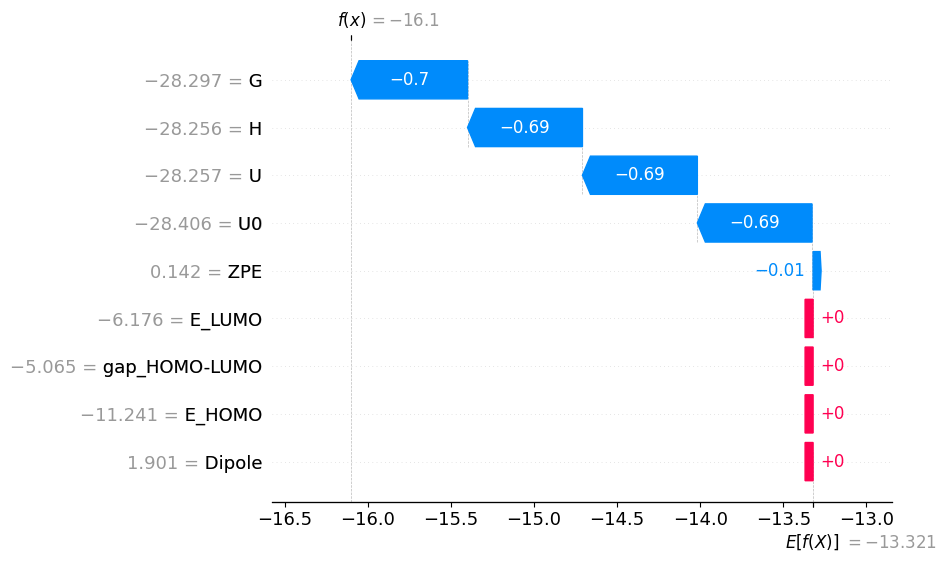

In [234]:
shap.plots.waterfall(shap_values_exp[0])

O gráfico acima é um *waterfall plot* do SHAP, que mostra como cada *feature* contribui individualmente para a predição de uma amostra específica do modelo.

**Estrutura do gráfico**

- $\mathbb{E}[f(X)] = −13.321$ → é o valor médio das predições do modelo (baseline).  
- $f(x)=−16.01$ → é a predição final para esta amostra.  
- As barras mostram como cada *feature* desloca o valor da predição em relação à média.  
  - **Azul**: contribuição negativa (reduz o valor previsto).  
  - **Vermelho**: contribuição positiva.

**Interpretação Detalhada**

1. `G`, `H`, `U` e `U0`
- As quatro variáveis termodinâmicas dominantes atuam todas no mesmo sentido, empurrando a predição para valores mais negativos.
- Cada uma dessas *features* contribui com aproximadamente $-0.69$ a $-0.70$, configurando um deslocamento cumulativo substancial em relação ao valor esperado.
- Os valores observados dessas variáveis (energias fortemente negativas) situam-se em um regime que, conforme indicado nas análises globais, está associado a contribuições SHAP negativas.
- Esse comportamento evidencia uma superposição linear coerente, típica do modelo SGD, na qual cada termo energético adiciona uma correção aproximadamente constante e aditiva à predição.

2. `ZPE`
- A energia do ponto zero apresenta contribuição praticamente nula, com impacto da ordem de $-0.01$.
- Embora não completamente irrelevante, sua influência é desprezível quando comparada às grandezas termodinâmicas globais.
- Isso confirma seu papel secundário, atuando no máximo como um ajuste fino local.

3. `E_LUMO`, `gap_HOMO–LUMO`, `E_HOMO` e `Dipole`
- Essas propriedades eletrônicas exibem contribuições SHAP nulas ou virtualmente nulas para a instância analisada.
- Mesmo assumindo valores relativamente extremos, elas não alteram de forma mensurável a predição final.
- Tal comportamento reflete a supressão efetiva dessas variáveis pelo processo de regularização, conforme já indicado pelas análises globais.

O *waterfall plot* explicita, em nível local, o mesmo mecanismo identificado globalmente: a predição do modelo SGD é construída quase inteiramente a partir de termos energéticos globais, que atuam de forma cumulativa e coerente para deslocar a resposta em relação ao valor médio. A ausência de compensações significativas entre *features* reforça o caráter linear, estável e fisicamente interpretável do modelo.

***Insight* científico**

A convergência entre explicações globais (*summary* e *bar plots*) e locais (*waterfall plot*) revela que o modelo SGD não apenas apresenta bom desempenho médio, mas também mantém consistência causal local. A instância analisada é classificada como energeticamente mais estável (energias mais negativas), e essa condição é traduzida diretamente em uma predição mais baixa, sem depender de efeitos eletrônicos sutis. Isso sugere que o modelo aprendeu um princípio energético universal, aplicável de forma homogênea tanto em média quanto em casos individuais, reforçando sua robustez física e interpretabilidade científica.

# Conclusão

A análise do modelo SGD, fundamentada tanto nas métricas de desempenho quanto nas interpretações obtidas via SHAP, conduz a uma conclusão clara, consistente e fisicamente coerente com os resultados previamente observados para modelos lineares regularizados, como o ElasticNet, e com a estrutura inferida para o SVR.

O modelo SGD otimizado via `optuna` apresentou desempenho preditivo excepcional, com $\mathrm{RMSE} \approx 1.73 \times 10^{-4}$ durante o processo de otimização e $\mathrm{RMSE} \approx 1.74 \times 10^{-4}$ no treinamento final com os hiperparâmetros selecionados. A diferença praticamente desprezível entre esses valores indica alta estabilidade numérica, ausência de *overfitting* relevante e excelente capacidade de generalização, mesmo sob um regime fortemente regularizado.

A escolha da função de perda quadrática, combinada à penalização L2, a uma taxa de aprendizado adaptativa e a um valor extremamente pequeno de `alpha`, revela que o modelo converge para uma solução linear global altamente refinada, na qual os coeficientes são ajustados com precisão, mas sem amplificação espúria de ruído. A inclusão explícita de um estágio de *Variance Threshold* reforça ainda mais a parcimônia do modelo, eliminando variáveis de baixa variância antes mesmo do processo de ajuste.

Essa caracterização estrutural é plenamente corroborada pelas análises de SHAP. O *summary plot* e o *bar plot* mostram de forma inequívoca que a quase totalidade da capacidade explicativa do modelo está concentrada nas variáveis termodinâmicas globais `G`, `U0`, `H` e `U`, todas com importâncias médias praticamente idênticas. As demais *features* — incluindo propriedades eletrônicas como `E_HOMO`, `E_LUMO`, `gap_HOMO–LUMO` e `Dipole` — apresentam contribuições nulas ou residuais, sendo efetivamente descartadas pelo modelo.

A direção dos efeitos é estável e consistente: valores mais elevados das grandezas energéticas dominantes conduzem sistematicamente a contribuições SHAP negativas, deslocando a predição abaixo da média global. O *waterfall plot* confirma que, em nível local, essas mesmas variáveis explicam quase integralmente o valor final predito, sem compensações ocultas ou efeitos cruzados relevantes, assegurando plena coerência entre interpretações globais e individuais.

Em síntese, o modelo SGD atinge seu desempenho elevado ao explorar uma subestrutura energética de baixa dimensionalidade, essencialmente linear e fisicamente interpretável do espaço de atributos. A análise via SHAP não apenas valida essa estrutura interna, como também fornece suporte empírico sólido para a simplificação do modelo, a eliminação de variáveis irrelevantes e a compreensão clara dos *trade-offs* entre desempenho máximo, estabilidade e parcimônia. Trata-se, portanto, de um modelo que alia excelência preditiva, robustez estatística e aderência conceitual aos princípios físicos subjacentes ao problema.

# Referências

[1] HASTIE, Trevor; TIBSHIRANI, Robert; FRIEDMAN, Jerome. *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. 2. ed. New York: Springer, 2009.

[2] GOODFELLOW, Ian; BENGIO, Yoshua; COURVILLE, Aaron. *Deep Learning*. Cambridge: MIT Press, 2016.

[3] BISHOP, Christopher M. *Pattern Recognition and Machine Learning*. New York: Springer, 2006.

[4] JAMES, Gareth et al. *An Introduction to Statistical Learning*. 2. ed. New York: Springer, 2021.

[5] PEDREGOSA, Fabian et al. Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, v. 12, p. 2825–2830, 2011.

[6] TIKHONOV, Andrey N.; ARSENIN, Vasiliy Y. *Solutions of Ill-posed Problems*. Washington: Winston & Sons, 1977.

[7] ROBBINS, Herbert; MONRO, Sutton. A stochastic approximation method. *The Annals of Mathematical Statistics*, v. 22, n. 3, p. 400–407, 1951.

[8] LUNDBERG, Scott M.; LEE, Su-In. A Unified Approach to Interpreting Model Predictions. *Advances in Neural Information Processing Systems*, v. 30, 2017.

[9] d’Oleron, Luiz. Deep Learning from Scratch in Modern C++: Gradient Descent. Towards AI, Maio 08, 2023. Disponível em: https://pub.towardsai.net/deep-learning-from-scratch-in-modern-c-gradient-descent-670bc5889112. Acesso em: 26 Dez. 2025.

[10] LIGEIRO, Gabriel. Como interpretar seu modelo de machine learning usando SHAP values. Medium, 5 dez. 2020. Disponível em: https://gabrielligeiro.medium.com/como-interpretar-seu-modelo-de-machine-learning-usando-shap-values-2c61c0d26317. Acesso em: 24 out. 2025.

[11] LUNDBERG, Scott; LEE, Su-In. SHAP – Welcome to the SHAP documentation. 2018. Disponível em: https://shap.readthedocs.io/en/latest/. Acesso em: 24 out. 2025.

[12] AWAN, Abid Ali. Uma introdução aos valores SHAP e à interpretabilidade do aprendizado de máquina. DataCamp, 11 set. 2024. Disponível em: https://www.datacamp.com/pt/tutorial/introduction-to-shap-values-machine-learning-interpretability. Acesso em: 24 out. 2025.